In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)




Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.pad= nn.ZeroPad2d(2)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.norm= nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(6* 16 * 16, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.norm(self.conv1(self.pad(x)))))
        x = x.view(-1, 6* 16 * 16)
        x = self.fc1(x)
        return x



    

cpu


In [ ]:
import torch.optim as optim
net1= Net1()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)
net1.to(device)

Net1(
  (pad): ZeroPad2d(padding=(2, 2, 2, 2), value=0.0)
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (norm): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1536, out_features=10, bias=True)
)

In [ ]:
PATH = './cifar_net.pth'
torch.save(net1.state_dict(), PATH)

In [ ]:
# Removed batch layer
class Net_no_batch(nn.Module):
    def __init__(self):
        super(Net_no_batch, self).__init__()
        self.pad= nn.ZeroPad2d(2)
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(6* 16 * 16, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(self.pad(x))))
        x = x.view(-1, 6* 16 * 16)
        x = self.fc1(x)
        return x
import torch.optim as optim
net_no_batch= Net_no_batch()
net_no_batch.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_no_batch.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(3):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net_no_batch(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_no_batch(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

[1,  2000] loss: 1.806
[1,  4000] loss: 1.553
[1,  6000] loss: 1.508
[1,  8000] loss: 1.481
[1, 10000] loss: 1.436
[1, 12000] loss: 1.399
[2,  2000] loss: 1.362
[2,  4000] loss: 1.317
[2,  6000] loss: 1.335
[2,  8000] loss: 1.376
[2, 10000] loss: 1.335
[2, 12000] loss: 1.355
[3,  2000] loss: 1.256
[3,  4000] loss: 1.267
[3,  6000] loss: 1.291
[3,  8000] loss: 1.297
[3, 10000] loss: 1.300
[3, 12000] loss: 1.306
Finished Training
Accuracy of the network on the 10000 test images: 51 %


In [ ]:
# Fully connected two layers
class Net_b(nn.Module):
    def __init__(self):
        super(Net_b, self).__init__()
        self.pad= nn.ZeroPad2d(2)
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.norm= nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16* 16 * 16, 64)
        self.fc2 = nn.Linear(64, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.norm(self.conv1(self.pad(x)))))
        x = x.view(-1, 16* 16 * 16)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
import torch.optim as optim
net_b= Net_b()
net_b.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_b.parameters(), lr=0.001, momentum=0.9)



In [ ]:
for epoch in range(3):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net_b(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_b(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

[1,  2000] loss: 1.770
[1,  4000] loss: 1.543
[1,  6000] loss: 1.470
[1,  8000] loss: 1.396
[1, 10000] loss: 1.347
[1, 12000] loss: 1.341
[2,  2000] loss: 1.250
[2,  4000] loss: 1.229
[2,  6000] loss: 1.213
[2,  8000] loss: 1.224
[2, 10000] loss: 1.201
[2, 12000] loss: 1.169
[3,  2000] loss: 1.119
[3,  4000] loss: 1.143
[3,  6000] loss: 1.133
[3,  8000] loss: 1.127
[3, 10000] loss: 1.133
[3, 12000] loss: 1.132
Finished Training
Accuracy of the network on the 10000 test images: 57 %


In [ ]:
# 2 layer conv,batch,max pool
class Net_c(nn.Module):
    def __init__(self):
        super(Net_c, self).__init__()
        self.pad= nn.ZeroPad2d(2)
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.norm1= nn.BatchNorm2d(16)
        self.norm2= nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32* 8 * 8, 64)
        self.fc2 = nn.Linear(64, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.norm1(self.conv1(self.pad(x)))))
        x = self.pool(F.relu(self.norm2(self.conv2(self.pad(x)))))
        x = x.view(-1, 32* 8 * 8)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
import torch.optim as optim
net_c= Net_c()
net_c.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_c.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net_c(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_c(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

[1,  2000] loss: 1.757
[1,  4000] loss: 1.472
[1,  6000] loss: 1.359
[1,  8000] loss: 1.254
[1, 10000] loss: 1.207
[1, 12000] loss: 1.133
[2,  2000] loss: 1.075
[2,  4000] loss: 1.052
[2,  6000] loss: 1.040
[2,  8000] loss: 1.027
[2, 10000] loss: 0.990
[2, 12000] loss: 1.002
[3,  2000] loss: 0.921
[3,  4000] loss: 0.943
[3,  6000] loss: 0.922
[3,  8000] loss: 0.911
[3, 10000] loss: 0.929
[3, 12000] loss: 0.899
[4,  2000] loss: 0.834
[4,  4000] loss: 0.845
[4,  6000] loss: 0.865
[4,  8000] loss: 0.849
[4, 10000] loss: 0.864
[4, 12000] loss: 0.841
[5,  2000] loss: 0.807
[5,  4000] loss: 0.811
[5,  6000] loss: 0.784
[5,  8000] loss: 0.806
[5, 10000] loss: 0.815
[5, 12000] loss: 0.814
Finished Training
Accuracy of the network on the 10000 test images: 69 %


In [8]:
# 3 layer conv,batch,max pool
class Net_d(nn.Module):
    def __init__(self):
        super(Net_d, self).__init__()
        self.pad= nn.ZeroPad2d(2)
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 5)
        self.norm1= nn.BatchNorm2d(16)
        self.norm2= nn.BatchNorm2d(32)
        self.norm3= nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64* 4 * 4, 64)
        self.fc2 = nn.Linear(64, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.norm1(self.conv1(self.pad(x)))))
        x = self.pool(F.relu(self.norm2(self.conv2(self.pad(x)))))
        x = self.pool(F.relu(self.norm3(self.conv3(self.pad(x)))))
        x = x.view(-1, 64* 4 * 4)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
import torch.optim as optim
net_d= Net_d()
net_d.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_d.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net_d(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_d(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

[1,  2000] loss: 1.745
[1,  4000] loss: 1.475
[1,  6000] loss: 1.356
[1,  8000] loss: 1.265
[1, 10000] loss: 1.202
[1, 12000] loss: 1.137
[2,  2000] loss: 1.037
[2,  4000] loss: 1.021
[2,  6000] loss: 0.980
[2,  8000] loss: 0.991
[2, 10000] loss: 0.964
[2, 12000] loss: 0.918
[3,  2000] loss: 0.818
[3,  4000] loss: 0.841
[3,  6000] loss: 0.834
[3,  8000] loss: 0.815
[3, 10000] loss: 0.829
[3, 12000] loss: 0.826
[4,  2000] loss: 0.735
[4,  4000] loss: 0.743
[4,  6000] loss: 0.724
[4,  8000] loss: 0.733
[4, 10000] loss: 0.737
[4, 12000] loss: 0.727
[5,  2000] loss: 0.630
[5,  4000] loss: 0.648
[5,  6000] loss: 0.662
[5,  8000] loss: 0.677
[5, 10000] loss: 0.668
[5, 12000] loss: 0.694
Finished Training
Accuracy of the network on the 10000 test images: 73 %


In [ ]:
PATH = './model.pth'
torch.save(net_d.state_dict(), PATH)



In [ ]:
!pip install torchsummary
from torchsummary import summary
summary(net_d, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1            [-1, 3, 36, 36]               0
            Conv2d-2           [-1, 16, 32, 32]           1,216
       BatchNorm2d-3           [-1, 16, 32, 32]              32
         MaxPool2d-4           [-1, 16, 16, 16]               0
         ZeroPad2d-5           [-1, 16, 20, 20]               0
            Conv2d-6           [-1, 32, 16, 16]          12,832
       BatchNorm2d-7           [-1, 32, 16, 16]              64
         MaxPool2d-8             [-1, 32, 8, 8]               0
         ZeroPad2d-9           [-1, 32, 12, 12]               0
           Conv2d-10             [-1, 64, 8, 8]          51,264
      BatchNorm2d-11             [-1, 64, 8, 8]             128
        MaxPool2d-12             [-1, 64, 4, 4]               0
           Linear-13                   [-1, 64]          65,600
           Linear-14                   

In [13]:
accuracy=[]
criterion = nn.CrossEntropyLoss()
net_d= Net_d()
net_d.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_d.parameters(), lr=0.001, momentum=0.9)
for epoch in range(5):  # loop over the dataset multiple times
    correct = 0.0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        outputs = net_d(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    for data in testloader:
        images_test, labels_test = data[0].to(device), data[1].to(device)
        outputs_test = net_d(images_test)
        _, predicted = torch.max(outputs_test.data, 1)
        total += labels_test.size(0)
        correct += (predicted == labels_test).sum().item()
    accuracy.append(100 * correct / total)

      
    

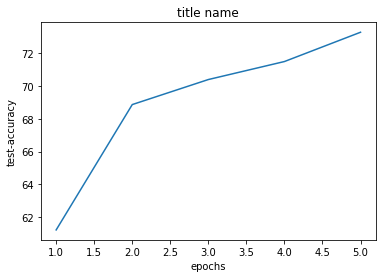

In [14]:
import matplotlib.pyplot as plt
epochs=[1,2,3,4,5]
plt.plot(epochs,accuracy)
plt.title('title name')
plt.xlabel('epochs')
plt.ylabel('test-accuracy')
plt.show()